# Assignment: Linear Regression
In this assignment you will implement Linear Regression for a very simple test case. Please fill into the marked places of the code
  
  (1) the cost function
  (2) the update function for Gradient Descent

Pieces of code that need to be updated are marked with "HERE YOU ..."

This assignment is kept very simple on purpose to help you familiarize with Linear Regression and its implementation using python (Jupyter notebooks). Feel free to make some useful tests such as, but not limited to:
- What happens if the learning rate is too high or too low?
- Can Linear Regression really find the absolute global minimum?
- What effect does it have if you change the initial guess for the gradient descent to something completely off?
- What happens if you are not updating thet0 and thet1 "simultaneously" but you are updating both parameters in separate for loops (see below)?
- You can try to turn this code for Linear Regression into an implementation of Logistic Regression

## Import the required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

## Function to calculate the Gradiend descent
You may find helpful the use of cost (one of the costFunction output parameters) to debug this method
Hint: print("Iteration %d | Cost: %f" % (i, cost))

In [2]:
def gradientDescent(x, y, theta, alpha, m, maxsteps):
    # HERE YOU HAVE TO IMPLEMENT THE UPDATE OF THE PARAMETERS
    thetaHist=np.empty([maxsteps, 2])
    xTrans = x.transpose()
    for i in range(0, maxsteps):
        gradient = np.dot(xTrans, np.dot(x, theta) - y) / m
        theta = theta - alpha * gradient
        thetaHist[i] = theta
   
    return theta, thetaHist

## Function to calcultate the cost function
The cost function template is returning two parameters, loss and cost. We proposed these two paremeters to facilitate the implementation having not only the cost but also the difference between y and the prediction directly (loss).

In [3]:
def costFunction(x, y, theta):

    # HERE YOU HAVE TO IMPLEMENT THE COST FUNCTION
    m = len(y)
    prediction = np.dot(x, theta)
    loss = prediction - y
    cost = np.sum(loss ** 2) / (2 * m)

    return cost, loss

## Define some training data
To test your algorithm it is a good idea to start with very simple test data where you know the right answer. So let's put all data points on a line first. Variables x and y represent a (very simple) training set (a dataset with 9 instances). Feel free to play with this test data or use a more realistic one.

$NOTE:$ The column with 1’s included in the variable x is used to facilitate the calculations in the Gradient Descent function (do you remember the x<sub>0</sub> to use the matrix form? If not, revise the lecture).

In [4]:
x=np.array([[1, 0], [1, 0.5], [1, 1], [1, 1.5], [1, 2], [1, 2.5], [1, 3], [1, 4], [1, 5]])
y=np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])

## Calculate length of training set


In [5]:
m, n = np.shape(x)

## Plot training set


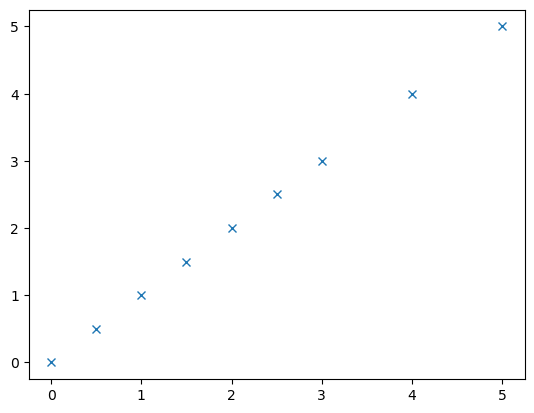

In [6]:
fig = plt.figure(1)  # An empty figure with no axes
plt.plot(x[:,1], y, 'x')

## Cost function
Also it is useful for simple test cases to not just run an optimization but first to do a systematic search. So let us first calculate the values of the cost function for different parameters theta


In [7]:
theta0 = np.arange(-2, 2.01, 0.25)
theta1 = np.arange(-2, 3.01, 0.25)

J = np.zeros((len(theta0), len(theta1))) 

# Calculate values of the cost function
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        # HERE YOU HAVE TO ADD THE COST FUNCTION FROM THE LECTURE
        theta_temp = np.array([theta0[i], theta1[j]])
        J[i, j] = costFunction(x,y,theta_temp)[0]

## Visualize the cost function
Let us do some test plots to see the cost function J and to analyze how it depends on the parameters theta0 and theta1


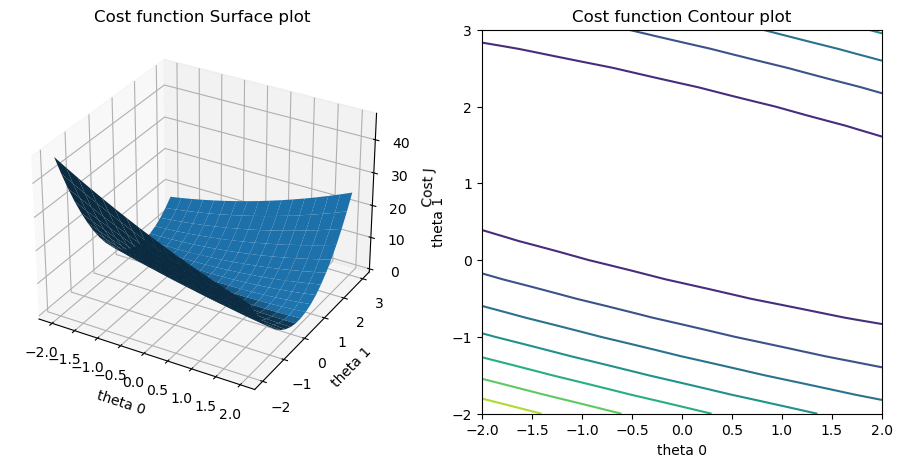

In [8]:
theta0, theta1 = np.meshgrid(theta0, theta1)
fig2 = plt.figure(2)
ax = fig2.add_subplot(121, projection="3d")
surf = ax.plot_surface(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost J')
ax.set_title('Cost function Surface plot')

ax = fig2.add_subplot(122)
contour = ax.contour(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_title('Cost function Contour plot')

fig2.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

## Gradient descent implementation
Here we implement Gradient Descent


In [9]:
alpha = 0.05        # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

## Print found optimal values



In [10]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

Optimized Theta0 is  3.9852928381292103e-07
Optimized Theta1 is  0.9999998725702243


## Visualization of the solution
Now let's plot the found solutions of the Gradient Descent algorithms on the contour plot of our cost function to see how it approaches the desired minimum.


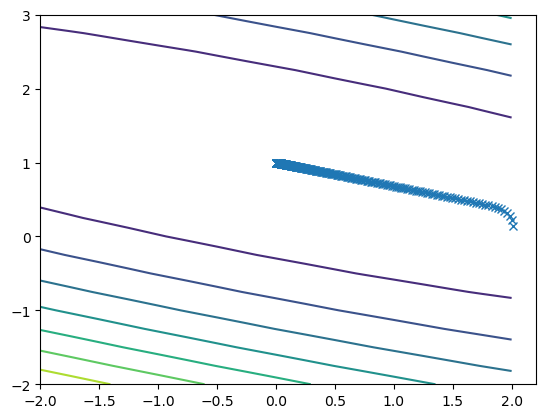

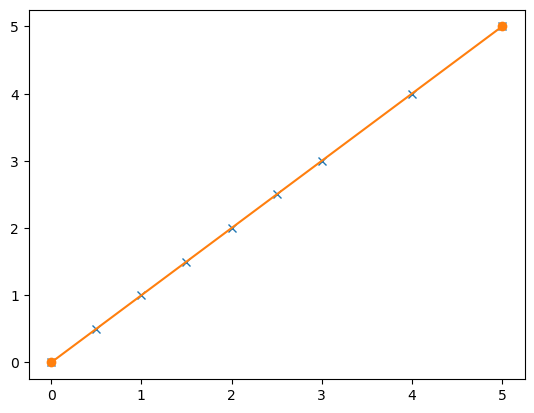

In [11]:
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

## Further Tasks 

### Next we will check the effects of learning rate
In genereal If learning rates are too high this can leas to oscillations (like in the picture below) or divergence. 
If learning rates are too low the convergence can be extremely slow and possibilities to get stuck in a local extremum rise.
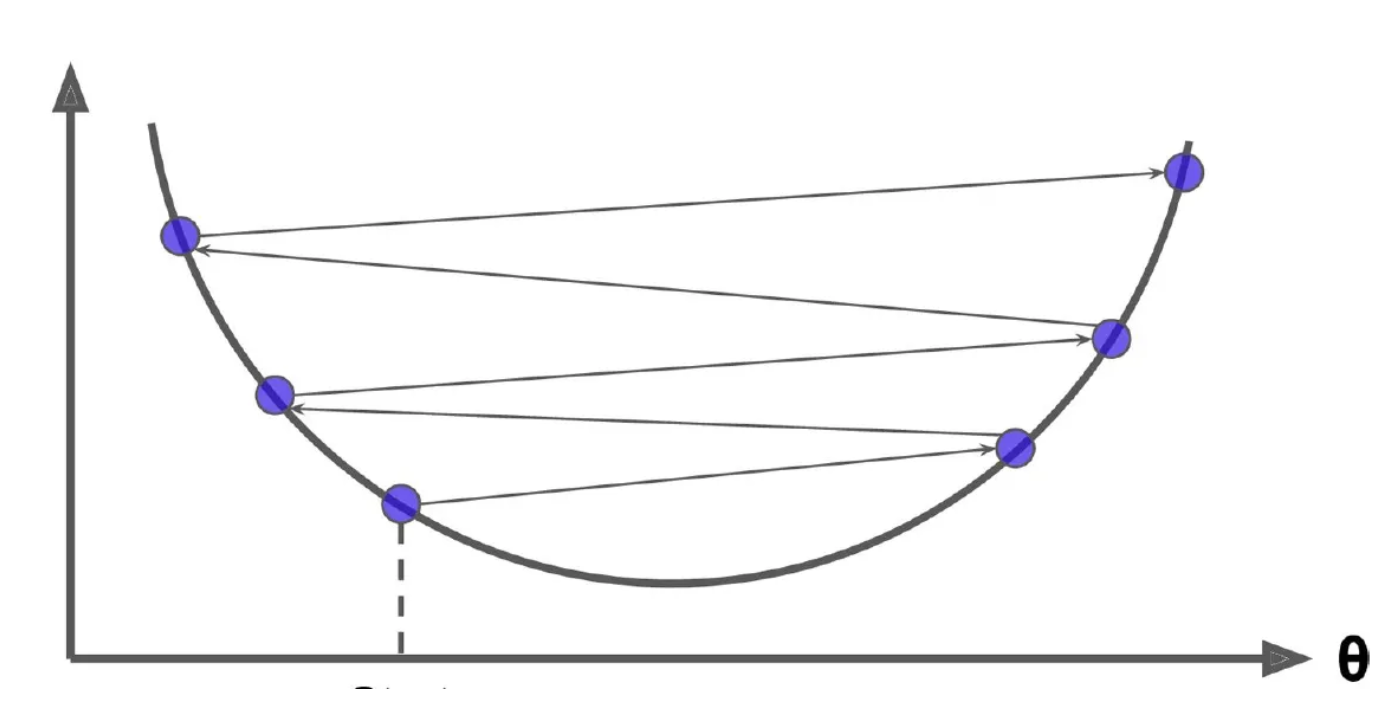


### Let's get some more insights on too high or too low learning rates
In the following we use a gradient descent on a quadratic function.\
As we use 2 different learning rates we can see oscillation occuring. 

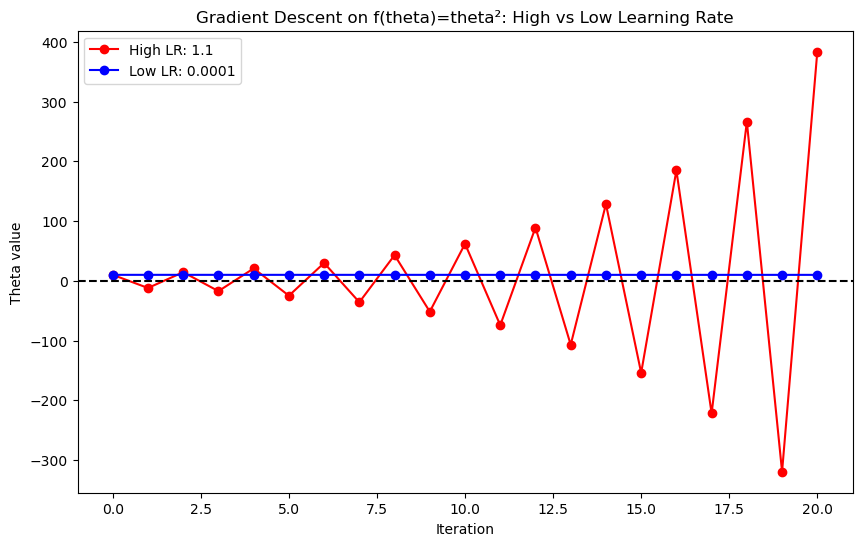

In [12]:
def gradient_descent_quadratic(theta_init, alpha, max_iter):
    theta = theta_init
    theta_history = [theta]
    for i in range(max_iter):
        grad = 2 * theta
        theta = theta - alpha * grad
        theta_history.append(theta)
    return np.array(theta_history)

# init theta und iter
theta_init = 10.0
max_iter = 20

# High learning rate (expect oscillations)
alpha_high = 1.1
theta_history_high = gradient_descent_quadratic(theta_init, alpha_high, max_iter)

# Low learning rate (expect slow convergence)
alpha_low = 0.0001
theta_history_low = gradient_descent_quadratic(theta_init, alpha_low, max_iter)

plt.figure(figsize=(10,6))
plt.plot(theta_history_high, 'ro-', label=f'High LR: {alpha_high}')
plt.plot(theta_history_low, 'bo-', label=f'Low LR: {alpha_low}')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('Theta value')
plt.title('Gradient Descent on f(theta)=theta²: High vs Low Learning Rate')
plt.legend()
plt.show()


In [13]:
# gradient descent function that takes learning rate as input parameter
def gradientDescent(x, y, theta, alpha, m, maxsteps):
    thetaHist = np.empty([maxsteps, 2])
    cost_history = []
    for i in range(maxsteps):
        predictions = x.dot(theta)
        loss = predictions - y
        cost = (1/(2*m)) * np.sum(loss**2)
        cost_history.append(cost)
        theta = theta - (alpha/m) * (x.T.dot(loss))
        thetaHist[i] = theta
    return theta, thetaHist, cost_history

## Can Linear Regression really find the absolute global minimum. 
Yes and no, linear reg. with a mean-square error function is convex, it converges to a global minimum.\
However, most of the times, we take a error tolerance epsylon where we accept the solution early on or use early stopping after a certain amount of epochs. The contour plot below displays the cost function for various parameter values and overlays the path taken by gradient descent. The path converges smoothly to the global minimum.

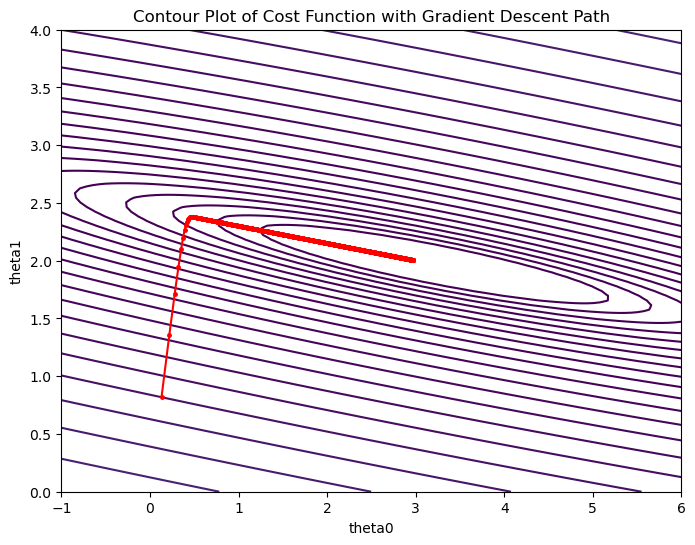

In [ ]:
np.random.seed(0)
m = 100
X = np.linspace(0, 10, m)
y = 3 + 2 * X + np.random.randn(m)  # y = 3 + 2*x + noise

X_design = np.c_[np.ones(m), X]

# Define grid for theta values
theta0_vals = np.linspace(-1, 6, 100)
theta1_vals = np.linspace(0, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        theta_temp = np.array([t0, t1])
        predictions = X_design.dot(theta_temp)
        loss = predictions - y
        J_vals[i, j] = (1/(2*m)) * np.sum(loss**2)

# Run gradient descent to record trajectory
theta_init = np.array([0.0, 0.0])
_, thetaHist, _ = gradientDescent(X_design, y, theta_init, 0.01, m, 1000)

T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
plt.figure(figsize=(8,6))
plt.contour(T0, T1, J_vals.T, levels=np.logspace(0, 3, 30))
plt.plot(thetaHist[:, 0], thetaHist[:, 1], 'r.-', markersize=5)
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Contour Plot of Cost Function with Gradient Descent Path')
plt.show()


## Next let's have a look at the impact of inital theta values. 

Depending on the start value we need a different amount of iterations to get to equal results.\
Even if the starting point is far from the optimum, the convexity of the cost function ensures convergence provided the learning rate is appropriate.

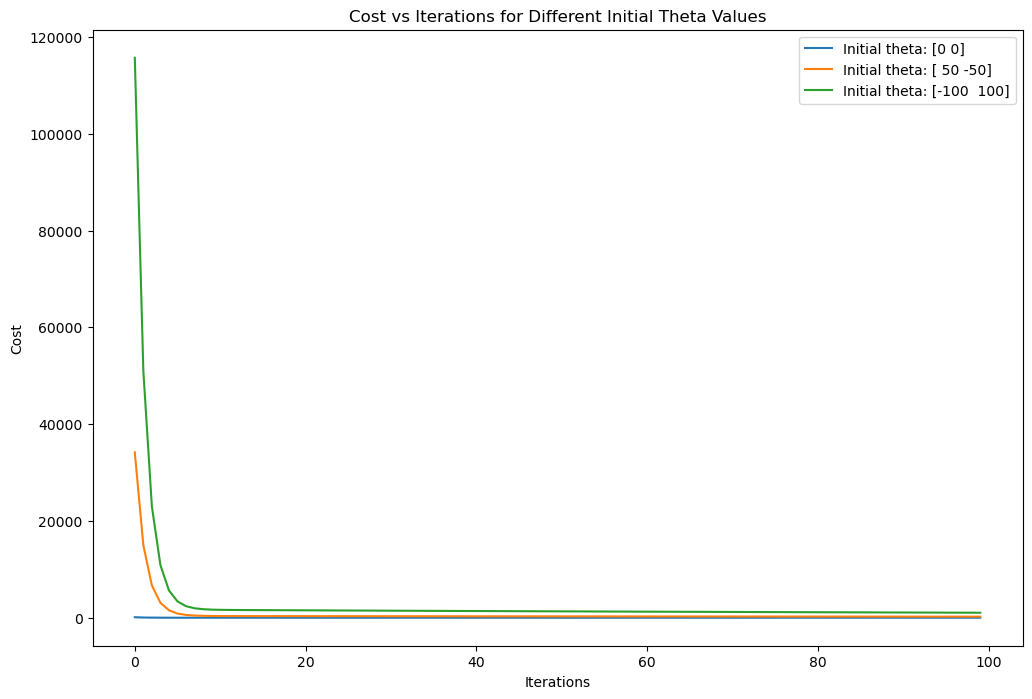

In [15]:
initial_thetas = [np.array([0, 0]), np.array([50, -50]), np.array([-100, 100])]
plt.figure(figsize=(12,8))
for init in initial_thetas:
    _, _, cost_hist = gradientDescent(X_design, y, init, 0.01, m, 100)
    plt.plot(cost_hist, label=f'Initial theta: {init}')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for Different Initial Theta Values')
plt.legend()
plt.show()


## Good now let's compare the "correct way" of updating parameters to sequential updates

In batch gradient descent, parameters must be updated simultaneously.\
If the parameters are updated sequentially (one after the other), the update for the second parameter uses the already updated first parameter, leading to inaccuracies. The following code compares both approaches.\
We create a regression for both applications and plot the difference/ distance afterwards

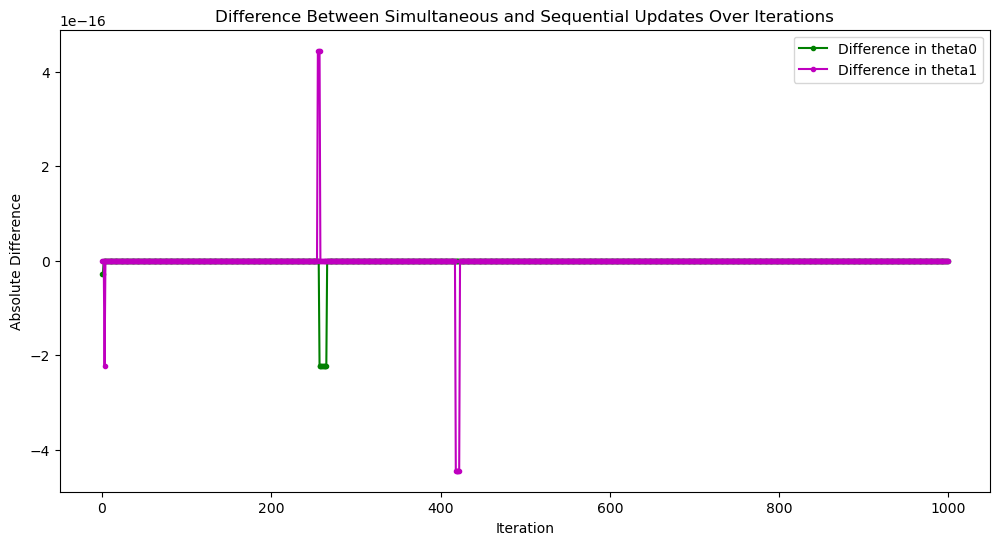

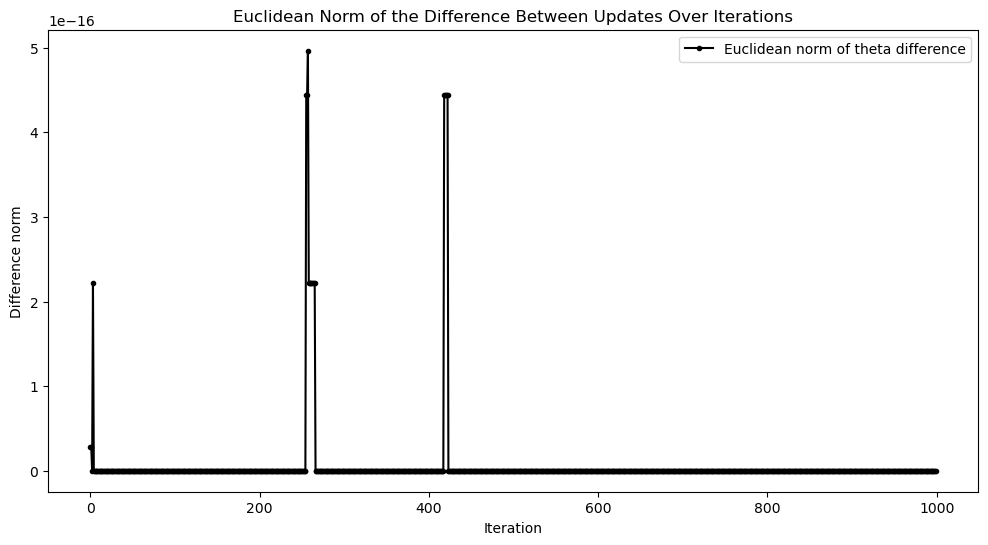

In [16]:
def gradientDescent_nonSimultaneous(x, y, theta, alpha, m, maxsteps):
    thetaHist = np.empty([maxsteps, 2])
    for i in range(maxsteps):
        predictions = x.dot(theta)
        loss = predictions - y
        grad0 = (1/m) * np.sum(loss)
        grad1 = (1/m) * np.sum(loss * x[:, 1])
        # Sequential update (not sim)
        theta[0] = theta[0] - alpha * grad0
        theta[1] = theta[1] - alpha * grad1
        thetaHist[i] = theta
    return theta, thetaHist

theta_init = np.array([0.0, 0.0])
theta_final_sim, thetaHist_sim, _ = gradientDescent(X_design, y, theta_init.copy(), 0.01, m, 1000)
theta_final_seq, thetaHist_seq = gradientDescent_nonSimultaneous(X_design, y, theta_init.copy(), 0.01, m, 1000)

import matplotlib.pyplot as plt

diff_theta = thetaHist_sim - thetaHist_seq

plt.figure(figsize=(12, 6))

plt.plot(diff_theta[:, 0], 'g.-', label='Difference in theta0')
plt.plot(diff_theta[:, 1], 'm.-', label='Difference in theta1')
plt.xlabel('Iteration')
plt.ylabel('Absolute Difference')
plt.title('Difference Between Simultaneous and Sequential Updates Over Iterations')
plt.legend()
plt.show()

norm_diff = np.linalg.norm(diff_theta, axis=1)
plt.figure(figsize=(12, 6))
plt.plot(norm_diff, 'k.-', label='Euclidean norm of theta difference')
plt.xlabel('Iteration')
plt.ylabel('Difference norm')
plt.title('Euclidean Norm of the Difference Between Updates Over Iterations')
plt.legend()
plt.show()




# Next let's check the number of iterations to reach a global minimum 
Theoretically, gradient descent with a constant learning rate only approaches the global minimum asymptotically. In practice, one sets a tolerance level to decide when to stop. We compare the gradient descent result with the exact solution obtained from the normal equation.\
As a tolerance we use an epyslon of 0.000001

In [17]:
# Compute the closed-form solution using the normal equation
theta_closed = np.linalg.inv(X_design.T.dot(X_design)).dot(X_design.T).dot(y)

def gradientDescent_withTolerance(x, y, theta, alpha, m, maxsteps, tol=1e-6):
    thetaHist = np.empty([maxsteps, 2])
    error_history = []
    for i in range(maxsteps):
        predictions = x.dot(theta)
        loss = predictions - y
        theta = theta - (alpha/m) * (x.T.dot(loss))
        thetaHist[i] = theta
        error = np.linalg.norm(theta - theta_closed)
        error_history.append(error)
        if error < tol:
            break
    return theta, thetaHist[:i+1], error_history

theta_init = np.array([0.0, 0.0])
theta_final_tol, thetaHist_tol, error_history = gradientDescent_withTolerance(X_design, y, theta_init.copy(), 0.01, m, 10000)
iterations_needed = len(error_history)
print("Iterations needed to reach tolerance:", iterations_needed)


Iterations needed to reach tolerance: 5986


## Finally: Some Logistic Regression

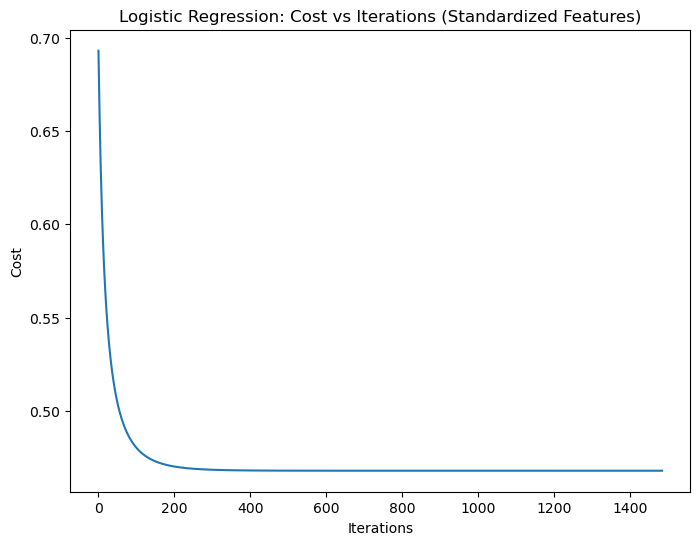

Test accuracy on diabetes dataset: 0.7532467532467533


In [18]:
data = pd.read_csv('diabetes.csv')
data['class'] = data['class'].map({'tested_positive': 1, 'tested_negative': 0}) # class is string value 

# Extract features and labels
X = data.drop('class', axis=1).values
y = data['class'].values.astype(np.float64)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (zero mean, unit variance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept term to X_train and X_test
X_train = np.c_[np.ones(len(y_train)), X_train]
X_test = np.c_[np.ones(len(y_test)), X_test]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costFunction_logistic(x, y, theta):
    m = len(y)
    h = sigmoid(x.dot(theta))
    h = np.clip(h, 1e-10, 1 - 1e-10)  # Clip h to avoid log(0) -> still don't get why
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    gradient = (1/m) * x.T.dot(h - y)
    return cost, gradient

def gradientDescent_logistic(x, y, theta, alpha, maxsteps, tol=1e-6):
    thetaHist = np.empty([maxsteps, theta.shape[0]])
    cost_history = []
    for i in range(maxsteps):
        cost, grad = costFunction_logistic(x, y, theta)
        cost_history.append(cost)
        theta_new = theta - alpha * grad
        thetaHist[i] = theta_new
        if np.linalg.norm(theta_new - theta, ord=1) < tol:
            theta = theta_new
            cost_history = cost_history[:i+1]
            thetaHist = thetaHist[:i+1]
            break
        theta = theta_new
    return theta, thetaHist, cost_history

# Initialize theta for logistic regression
theta_init_log = np.zeros(X_train.shape[1])
# Increase learning rate to 0.1 for scaled features; set maxsteps to 10000 iterations
theta_final_log, thetaHist_log, cost_history_log = gradientDescent_logistic(
    X_train, y_train, theta_init_log, alpha=0.1, maxsteps=10000)

# Plot the cost function over iterations
plt.figure(figsize=(8,6))
plt.plot(cost_history_log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Logistic Regression: Cost vs Iterations (Standardized Features)')
plt.show()

# Evaluate classification performance on the test set
predictions = sigmoid(X_test.dot(theta_final_log)) >= 0.5
accuracy = accuracy_score(y_test, predictions)
print("Test accuracy on diabetes dataset:", accuracy)
